In [1]:
import scipy.io as sio
import repro_functions as repro
import numpy as np

In [172]:
fol = r'f:\desktop\Code\Reproducibility\python\reproducibility\data\out'
group = -160
#spikes = 'constant'
spikes = 'varying'

dataset = sio.loadmat(fol + '\\repro_ITD' + str(group) + '_001_' + spikes + '.mat')

fr = dataset['fr']
cw = dataset['cw']
curve = dataset['curve']

del fol, dataset

In [173]:
win = 0.0005 / cw
neurons, bins = np.shape(curve)
center = bins / 2
curve = curve[:, int(center - win):int(center + win)]
del win, neurons, bins, center

In [174]:
strength = []
for c, m in zip(curve, fr.T):
    n, s = repro.brettenorm(c, m, cw)
    strength.append(s[0][0])
del c, m, n, s

In [175]:
sio.savemat('repro_ITD' + str(group) + '_001_' + spikes + '_strength.mat', {'strength':strength})
del group

In [176]:
del curve, cw, fr, strength

# scratch space for investigating

In [66]:
import matplotlib.pyplot as plt

In [93]:
fol = r'f:\desktop\Code\Reproducibility\python\reproducibility\data\out'
group = 100
spikes = 'constant'

dataset = sio.loadmat(fol + '\\repro_ITD' + str(group) + '_002_' + spikes + '.mat')

constant_fr = dataset['fr']
cw = dataset['cw']
constant = dataset['curve']

del fol, dataset

In [94]:
fol = r'f:\desktop\Code\Reproducibility\python\reproducibility\data\out'
group = 100
spikes = 'varying'

dataset = sio.loadmat(fol + '\\repro_ITD' + str(group) + '_002_' + spikes + '.mat')

varying_fr = dataset['fr']
cw = dataset['cw']
varying = dataset['curve']

del fol, dataset

In [95]:
difference = constant.copy()

for i in range(len(constant)):
    difference[i] = constant[i] - varying[i]

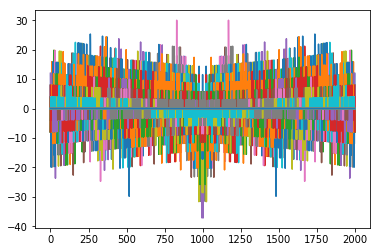

In [96]:
for i in range(len(difference)):
    plt.plot(difference[i])

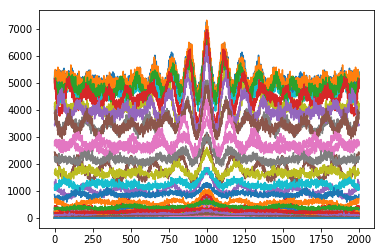

In [97]:
for i in range(len(constant)):
    plt.plot(constant[i])

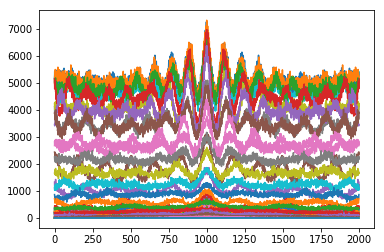

In [98]:
for i in range(len(varying)):
    plt.plot(varying[i])

In [127]:
constant_norm = constant.copy()
for i in range(len(constant)):
    n, s = repro.brettenorm(constant[i], constant_fr.T[i], cw)
    constant_norm[i] = n

varying_norm = varying.copy()
for i in range(len(varying)):
    n, s = repro.brettenorm(varying[i], varying_fr.T[i], cw)
    varying_norm[i] = n

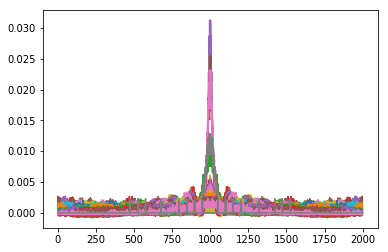

In [103]:
for i in range(len(varying_norm)):
    plt.plot(varying_norm[i])

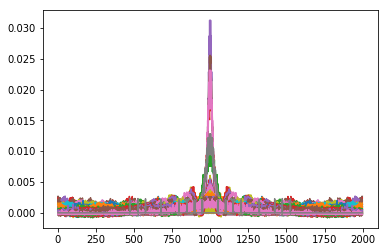

In [104]:
for i in range(len(constant_norm)):
    plt.plot(constant_norm[i])

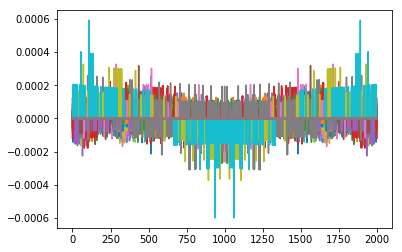

In [105]:
difference_norm = constant_norm.copy()

for i in range(len(constant_norm)):
    difference_norm[i] = constant_norm[i] - varying_norm[i]
    
for i in range(len(difference_norm)):
    plt.plot(difference_norm[i])

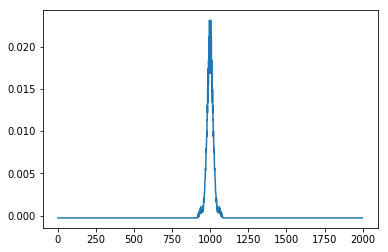

In [134]:
plt.plot(constant_norm[36])

In [133]:
700/fr.T[35]*cw

array([[0.0245]])

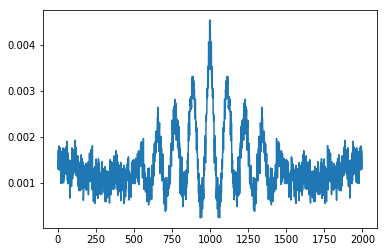

In [128]:
plt.plot(constant_norm[60])